# Pymaceuticals Inc.
---

### Analysis
This study analyzed the effects of 9 different drugs and a placebo on almost 250 mice over the course of 45 timepoint, which I would assume are days. 
The average size of the tumors was between approximately 40 and 50 cubic milimeters. There is a strong correlation between the size of the tumor and the weight of the mouse. There were between 150 and 250 points of data for each drug. With Capomulin and Ramicane having the most data points and Propriva having the least amount of data points. Looking at the bar graphs we can see that the Capomulin treatment seems to be very effective in reducing the size of the tumors. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice. 
combined_df["Mouse ID"].unique().size

249

In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. #array(['g989'], dtype=object) 

duplicated_df = combined_df.duplicated()
duplicated_df.sort_values()

#row 909 is duplicated
print(combined_df[["Mouse ID"]].iloc[909,:])

#mouse ID g898 is duplicated

Mouse ID    g989
Name: 909, dtype: object


In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
print(combined_df.iloc[909,:])

Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)        45.0
Metastatic Sites             0
Name: 909, dtype: object


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].unique().size

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen #Completed!!

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
drug_median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
drug_var = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
drug_std = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
drug_sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

drug_reg_counts = cleaned_df["Mouse ID"].groupby(cleaned_df["Drug Regimen"]).count()

sumstats_df = pd.DataFrame({"Mean Tumor Volume":drug_mean,
                            "Median Tumor Volume":drug_median,
                            "Tumor Volume Variance":drug_var,
                            "Tumor Volume Std. Dev":drug_std,
                            "Tumor Volume Std. Err.":drug_sem})
sumstats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, #not sure what they mean by this
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


KeyError: 'Drug Regimen'

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

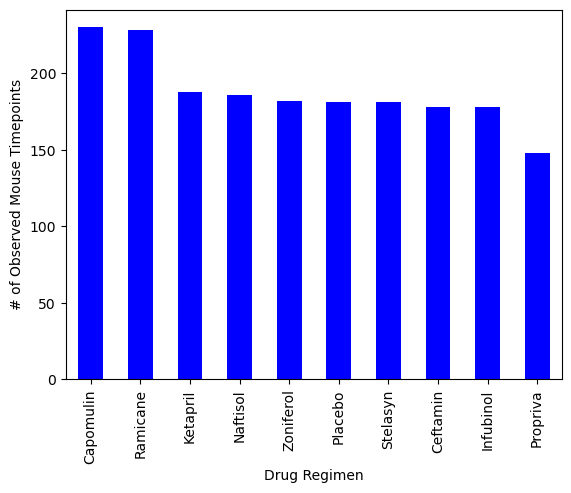

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas. #Change Color
drug_reg_counts = drug_reg_counts.sort_values(ascending=False)
drug_reg_counts.plot(kind="bar", x="x_axis", y="mouse_num",
          facecolor="blue",
           xlabel="Drug Regimen",
             ylabel="# of Observed Mouse Timepoints")

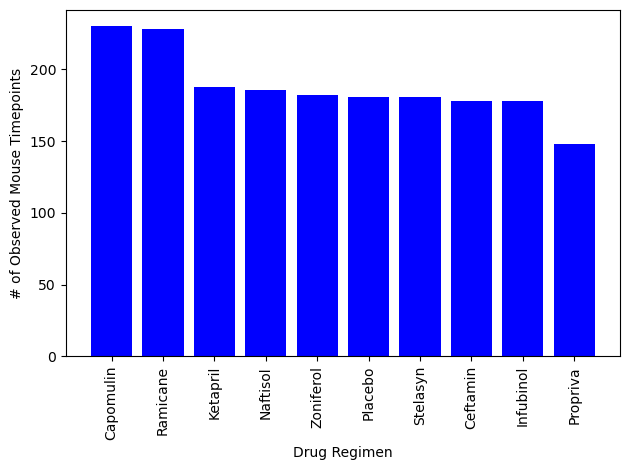

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot. #Need labels for x_axis
x_axis = np.arange(len(drug_reg_counts))
mouse_nums = drug_reg_counts
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]

plt.bar(x_axis, mouse_nums, color="blue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation=90)                

plt.tight_layout()
plt.show()


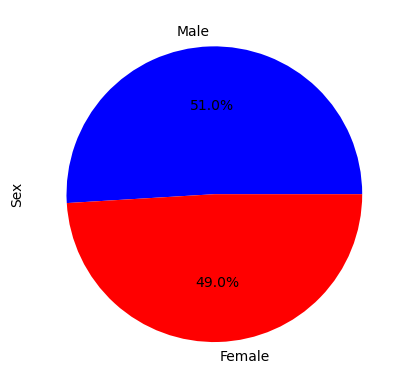

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas #Adjust Colors 
#male_female = combined_df["Sex"].unique()
mf_counts = cleaned_df["Sex"].value_counts()
pie = mf_counts
colors= ["blue", "red"]
male_vs_female = mf_counts.plot(kind="pie", y="Sex", colors=colors, autopct="%1.1f%%")
male_vs_female.set_ylabel("Sex")

plt.show()


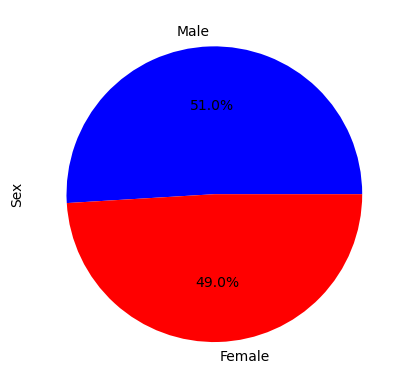

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleaned_df["Sex"].unique()
counts = mf_counts 
colors= ["blue", "red"]
plt.pie(counts, labels=gender, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_results_df = cleaned_df.loc[(cleaned_df["Timepoint"] == 45)]
filtered_final_results_df = final_results_df.loc[(final_results_df["Drug Regimen"] == "Capomulin")|
                                   (final_results_df["Drug Regimen"] == "Ramicane")|
                                   (final_results_df["Drug Regimen"] == "Infubinol")|
                                   (final_results_df["Drug Regimen"] == "Ceftamin")]

filtered_final_results_df = filtered_final_results_df.reset_index()
filtered_final_results_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
58,1797,x822,Ceftamin,Male,3,29,45,61.386660,3
59,1813,y163,Infubinol,Female,17,27,45,67.685569,3
60,1845,y769,Ceftamin,Female,6,27,45,68.594745,4
61,1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_size = filtered_final_results_df["Tumor Volume (mm3)"]
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outlier_tumors = filtered_final_results_df[(tumor_size < lower_bound) | (tumor_size > upper_bound)]
    outlier_tumors.head()

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(arr, showmeans=True)
plt.show()

NameError: name 'arr' is not defined

## Line and Scatter Plots

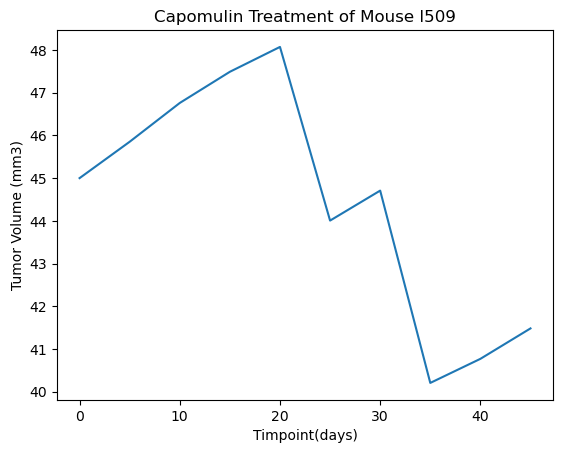

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin #Mouse L509

#Created new dataframe of mouse l509 of the Tumor Volume and Timpoint columns
mouse_l509 = cleaned_df.loc[(cleaned_df["Mouse ID"]) == "l509"]
mouse_l509 = mouse_l509[["Timepoint", "Tumor Volume (mm3)"]]

mouse_l509.plot(x="Timepoint", y="Tumor Volume (mm3)", xlabel="Timpoint(days)", legend=False, ylabel="Tumor Volume (mm3)", title="Capomulin Treatment of Mouse l509")
plt.show()



/var/folders/w9/k4xhwbsx2f3cdrnn0qftk1x00000gn/T/ipykernel_15850/1475993807.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()


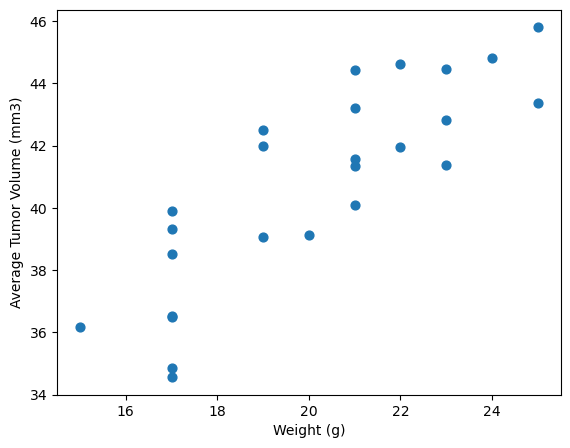

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen #Correct

#Grabbing all the mice on the drug Capomulin

capomulin_df = cleaned_df[(cleaned_df["Drug Regimen"] == "Capomulin")]

#Scatter plot by average observed tumor volume
tumor_mean = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()
tumor_mean.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40,
                 figsize=(6.5,5), xlabel="Weight (g)", ylabel="Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


/var/folders/w9/k4xhwbsx2f3cdrnn0qftk1x00000gn/T/ipykernel_15850/2623868289.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()


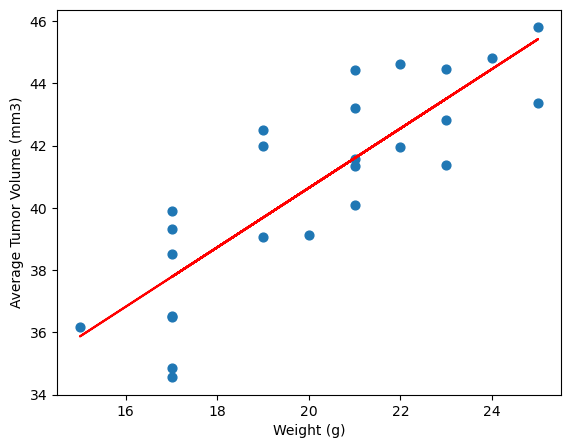

In [ ]:
# Calculate the correlation coefficient and a linear regression model #Correct!
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin")]
tumor_mean = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()

correlation = round(tumor_mean["Weight (g)"].corr(tumor_mean["Tumor Volume (mm3)"]), 2)

print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

#Linear Regression
#x_value = tumor_mean["Weight (g)"]
#y_value = 

(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_mean["Weight (g)"], tumor_mean["Tumor Volume (mm3)"])
regress_values = tumor_mean["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tumor_mean.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40,
                 figsize=(6.5,5), xlabel="Weight (g)", ylabel="Average Tumor Volume (mm3)")
plt.plot(tumor_mean["Weight (g)"],regress_values,"r-")

